In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
project_path = "/Users/ashmi/kaggle_competitions/titanic_ml/"
# make sure to use position 1
sys.path.insert(1, project_path)

In [3]:
df_train = pd.read_csv('/Users/ashmi/kaggle_competitions/titanic_ml/data/train.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df_train.shape

(891, 12)

In [7]:
## Calculating the number of NaNs in every column ##
df_train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
people_survived = df_train.loc[df_train['Survived'] == 1]


In [11]:
people_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
people_survived.shape

(342, 12)

In [13]:
people_not_survived = df_train.loc[df_train['Survived'] == 0]

In [14]:
people_not_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [15]:
people_not_survived.shape

(549, 12)

In [16]:
survived_count = people_survived['Sex'].value_counts()


In [17]:
not_survived_count = people_not_survived['Sex'].value_counts()


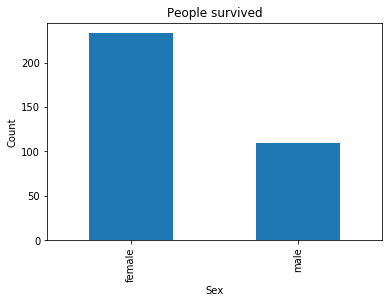

In [18]:

survived_count.plot('bar')
plt.title('People survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


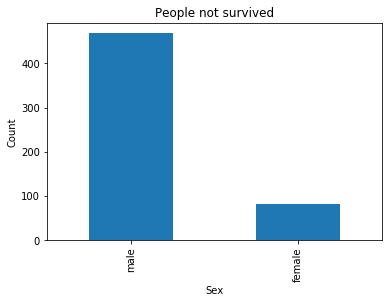

In [19]:
not_survived_count.plot('bar')
plt.title('People not survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

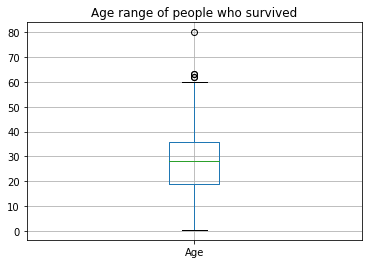

Min age of the people who survived 0.42
Max age of the people who survived 80.0


In [20]:

people_survived.boxplot(column='Age')
plt.title('Age range of people who survived')
plt.figure()
plt.show()

print('Min age of the people who survived',people_survived.Age.min())
print('Max age of the people who survived',people_survived.Age.max())

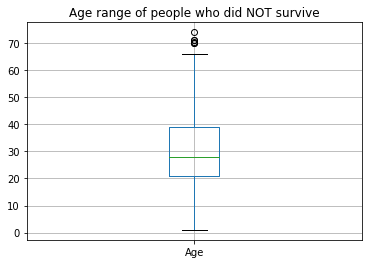

Min age of the people who did NOT survive 1.0
Max age of the people who did NOT survive 74.0


In [21]:
people_not_survived.boxplot(column='Age')
plt.title('Age range of people who did NOT survive')
plt.figure()
plt.show()
print('Min age of the people who did NOT survive',people_not_survived.Age.min())
print('Max age of the people who did NOT survive',people_not_survived.Age.max())

In [22]:
def age_group_categorise(df, labels, bins):
     df['Age_groups'] = pd.cut(df['Age'], bins = bins, labels = labels)   
     return df

In [23]:
## Binning ages of those who survived ##
bins = [0, 10, 20, 30, 40, 80]
labels = ['kid','teen','adult','middle-aged','old']
people_survived['Age_groups']= pd.cut(people_survived['Age'],bins, labels = labels)
people_not_survived['Age_groups'] = pd.cut(people_survived['Age'],bins, labels = labels)

/Users/ashmi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/ashmi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [24]:
people_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_groups
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle-aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,middle-aged
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,teen


In [25]:
people_survived['Age_groups'].value_counts()

adult          84
middle-aged    69
old            55
teen           44
kid            38
Name: Age_groups, dtype: int64

In [26]:
## Replaces males by 1 and females by 2 ##
# people_survived.loc[df['Sex'] == 'male', 'Sex'] = 1
# people_survived.loc[df['Sex'] == 'female', 'Sex'] = 2

In [27]:
people_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_groups
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle-aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,middle-aged
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,teen


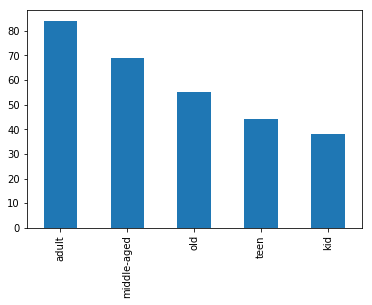

In [28]:
people_survived['Age_groups'].value_counts().plot(kind='bar')
plt.show()

In [29]:

people_survived_sex = people_survived.groupby(['Sex'])

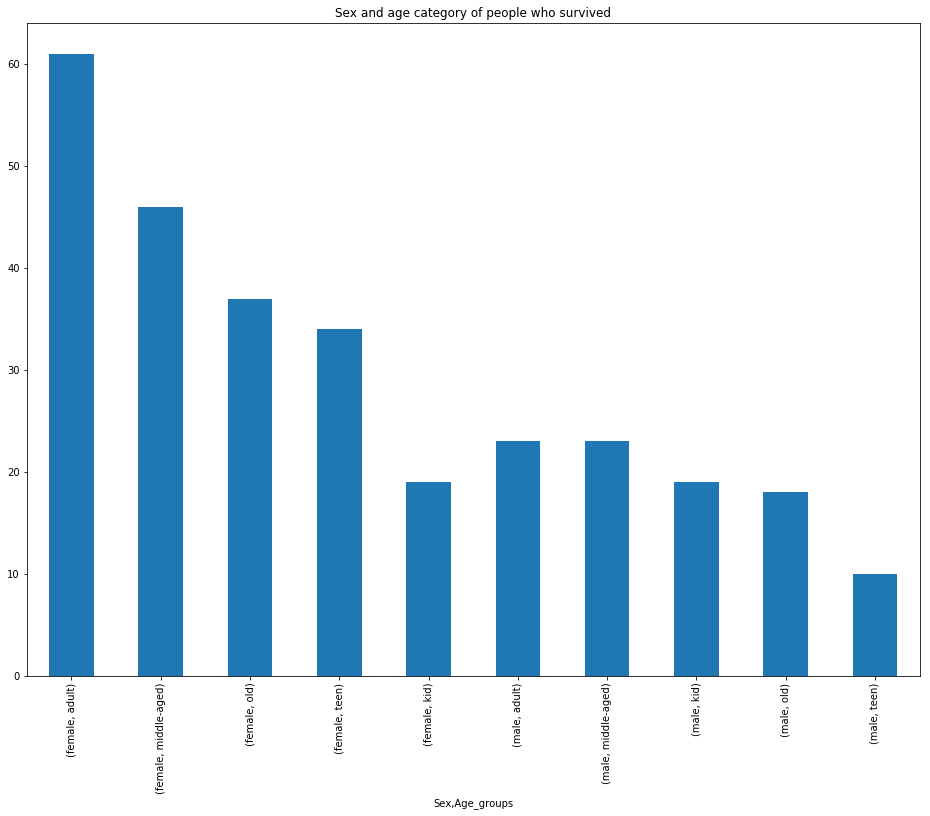

In [30]:
people_survived_sex['Age_groups'].value_counts().plot(kind='bar', figsize = (16,12))
plt.title('Sex and age category of people who survived')
plt.show()


In [31]:
people_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_groups
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle-aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,middle-aged
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,teen


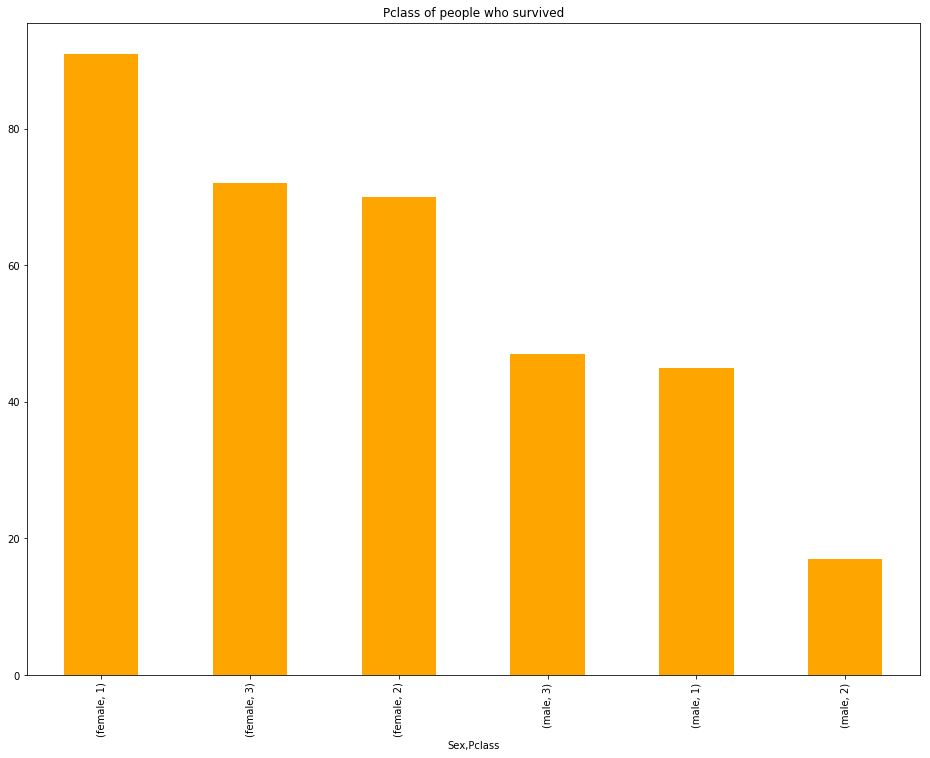

In [32]:
people_survived_sex['Pclass'].value_counts().plot(kind='bar', figsize = (16,12), color='orange')
plt.title('Pclass of people who survived')
plt.show()


## Predictions

### Data Preprocessing

In [33]:
def data_preprocess(data):
    
   data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
   data["Age"] = data["Age"].fillna(data["Age"].dropna().median())
   data = data.drop(['Fare'], axis=1)
   data = data.drop(['Ticket'], axis=1)
   data = data.drop(['Cabin'], axis=1)  
   data = data.drop(['Name'], axis=1)
   data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 2)
   fill_embark = df_train.Embarked.dropna().mode()[0]
   data['Embarked'] = data['Embarked'].fillna(fill_embark)    
   data['Embarked'] = data['Embarked'].apply(lambda x: 1 if x == 'S' else 2)
   data = age_group_categorise(data, bins = [0, 10, 20, 30, 40, 80], labels =[0,1,2,3,4])
   data = data.drop(['Age'], axis=1)
   
   return data

In [48]:
df_new = data_preprocess(df_train)

In [49]:
df_new.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_groups
0,1,0,3,1,1,0,1,2
1,2,1,1,2,1,0,2,3
2,3,1,3,2,0,0,1,2
3,4,1,1,2,1,0,1,3
4,5,0,3,1,0,0,1,3


In [50]:
def add_hypothesis_and_result(df):
    df["Hypothesis"] = 0
    df.loc[df.Sex == 2, "Hypothesis"] = 1

    df["Result"] = 0
    df.loc[df.Survived == df["Hypothesis"], "Result"] = 1
    return df

In [51]:
df_new = add_hypothesis_and_result(df_new)

In [55]:
df_new.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_groups,Hypothesis,Result
0,1,0,3,1,1,0,1,2,0,1
1,2,1,1,2,1,0,2,3,1,1
2,3,1,3,2,0,0,1,2,1,1
3,4,1,1,2,1,0,1,3,1,1
4,5,0,3,1,0,0,1,3,0,1


In [54]:
list(df_new)

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'Age_groups',
 'Hypothesis',
 'Result']

In [56]:
print(df_new["Result"].value_counts(normalize=True))

1    0.786756
0    0.213244
Name: Result, dtype: float64


## Data Preprocessing: Test Data

In [63]:
df_test = pd.read_csv('/Users/ashmi/kaggle_competitions/titanic_ml/data/test.csv')

In [64]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
df_test_new = data_preprocess(df_test)

In [67]:
df_test_new.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_groups,Hypothesis,Result
0,892,3,1,0,0,2,3,0,0
1,893,3,2,1,0,1,4,1,0
2,894,2,1,0,0,2,4,0,0
3,895,3,1,0,0,1,2,0,0
4,896,3,2,1,1,1,2,1,0


### Modelling

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [96]:

y_train = df_new["Survived"].values
x_train = df_new[["Pclass", "Sex", "Age_groups", "SibSp", "Parch"]].values

logisticRegr = LogisticRegression()
logisticRegr_ = logisticRegr.fit(features, target)

print(logisticRegr_.score(features, target))

0.7901234567901234


In [131]:
X_test = df_test_new[["Pclass", "Sex", "Age_groups", "SibSp", "Parch"]].values

predictions_test = logisticRegr.predict(X_test)

In [132]:
predictions_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [133]:
np.count_nonzero(predictions_test)

157

In [134]:
len(predictions_test)

418

In [101]:
import numpy as np

In [128]:
def calc_accuracy(predictions, true_vals):
    true_val_non_zero = np.count_nonzero(true_vals)
    pred_non_zero = np.count_nonzero(predictions)
    accuracy = pred_non_zero/true_val_non_zero
    return accuracy

In [135]:
from sklearn.metrics import classification_report
predictions_train = logisticRegr.predict(X_train)
print(classification_report(y_train, predictions_train))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83       549
          1       0.74      0.70      0.72       342

avg / total       0.79      0.79      0.79       891



### Decision Tree Classifier

In [62]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

/Users/ashmi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [112]:
X_train = df_new[["Pclass", "Sex", "Age_groups", "SibSp", "Parch"]].values
y_train = df_new["Survived"].values

X_test = df_test_new[["Pclass", "Sex", "Age_groups", "SibSp", "Parch"]].values


In [113]:
print(X_train.shape)
print(y_train.shape)

(891, 5)
(891,)


In [114]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [115]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [123]:
y_pred_test = clf_gini.predict(X_test)
y_pred_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [126]:
y_pred_train = clf_gini.predict(X_train)
y_pred_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [130]:
accuracy_score(y_train, y_pred_train)

0.8204264870931538

In [137]:
print(classification_report(y_train, y_pred_train))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       549
          1       0.79      0.73      0.76       342

avg / total       0.82      0.82      0.82       891



### Random Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [139]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [141]:
print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(x_train)))
# print "Test Accuracy  :: ", accuracy_score(y_test, predictions_test)

Train Accuracy ::  0.8518518518518519


In [142]:
y_pred_train = clf.predict(x_train)

In [143]:
y_pred_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [145]:
y_pred_test = clf.predict(X_test)

In [146]:
y_pred_test


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [147]:
print(classification_report(y_train, y_pred_train))

             precision    recall  f1-score   support

          0       0.85      0.92      0.88       549
          1       0.85      0.74      0.79       342

avg / total       0.85      0.85      0.85       891



#### Clearly Random forest performs better than Decision Trees Classifier

### Writing the results

In [149]:
test_data_copy = pd.read_csv('/Users/ashmi/kaggle_competitions/titanic_ml/data/test.csv')


In [150]:
submission = pd.DataFrame({
        "PassengerId": test_data_copy["PassengerId"],
        "Survived": y_pred_test
})

In [151]:
submission.to_csv('submission.csv', index=False)

In [152]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [153]:
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [154]:
np.count_nonzero(submission['Survived'].values)

155

In [156]:
len(submission['Survived'].values)

418